In [37]:
import pandas as pd
import numpy as np
import yaml
import os
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [25]:
params = yaml.safe_load(open("C:\MLOPS\Diabetes_Pred-DVC-\params.yaml"))

In [26]:
data = pd.read_csv(params['preprocessor']['input'])
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

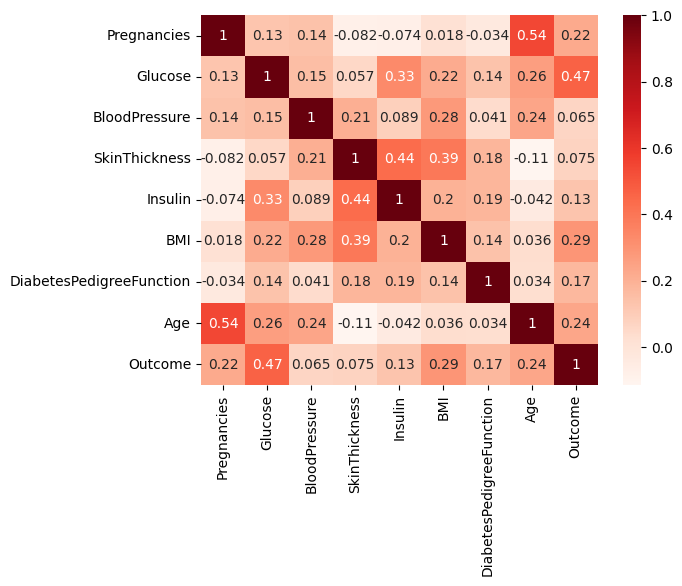

In [35]:
sns.heatmap(data.corr(), cmap = 'Reds', annot = True)

In [36]:
data = data.drop(columns=['BloodPressure', 'SkinThickness'], axis = 1)
data.head(5)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [48]:
y = data['Outcome']
x = data.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(614, 6) (154, 6) (614,) (154,)


<Axes: xlabel='Outcome', ylabel='count'>

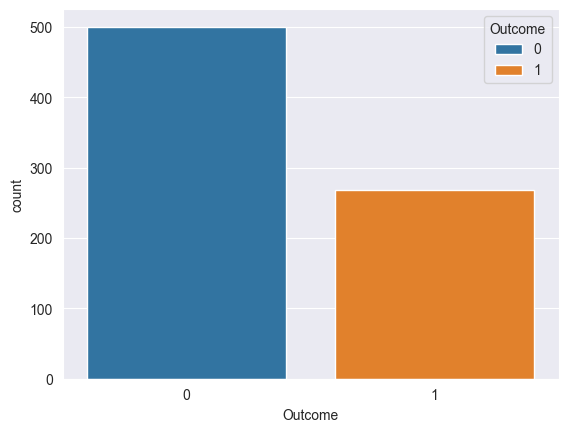

In [54]:
sns.set_style('darkgrid')
sns.countplot(data = data,x= data['Outcome'],hue = data['Outcome'])

<Axes: xlabel='Insulin', ylabel='Count'>

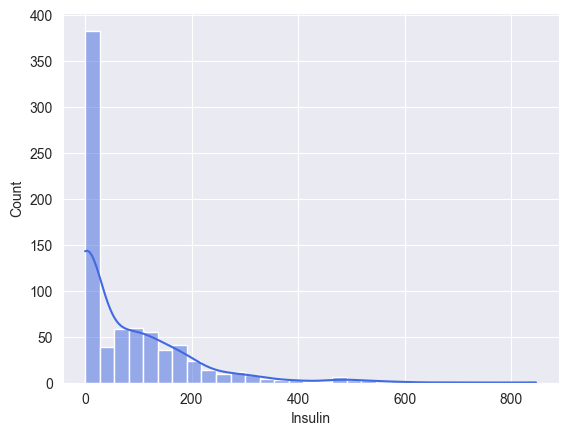

In [55]:
sns.histplot(data = data, x = data['Insulin'], color='royalblue', kde = True)

<Axes: xlabel='BMI', ylabel='Count'>

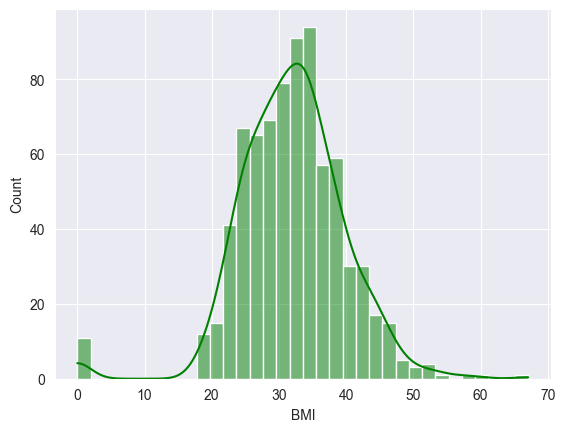

In [56]:
sns.histplot(data = data, x = data['BMI'], color='Green', kde = True)

<Axes: xlabel='Age', ylabel='Count'>

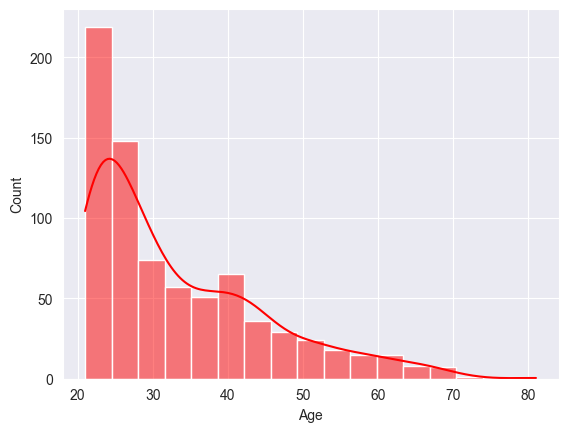

In [57]:
sns.histplot(data = data, x = data['Age'], color='Red', kde = True)